In [15]:
import pywt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Function to get n day moving average

In [16]:

def Moving_average(days):
    flow_data = pd.read_csv("epa_flow_data.csv").T
    end = flow_data.shape[1]
    holder = None
    for i in range (days-1):
        if holder is None:
            holder= flow_data.iloc[:,:end - (days-1)]
        else:
            holder+=flow_data.iloc[:,i:end - (days-1)+i]
        holder = holder/days
        cA,cD = pywt.dwt(holder,'db1')
        cA = pd.DataFrame(cA)
        cA.to_csv(f"{days}_Day_Moving_Average_Transformed.csv")
    return holder
data = Moving_average(3)


# 3 Day moving Average

In [17]:
from scipy.signal import cwt as wv
from scipy.signal import ricker as ricker

In [18]:

Data = Moving_average(5)
Data = Data.T
# Data = Data.drop(0,axis = 0)
print(Data.iloc[:,0])

0           NaN
1           NaN
2           NaN
3      0.004190
4      0.004789
         ...   
356    0.000599
357    0.000599
358    0.000599
359    0.000599
360    0.005986
Name: 11, Length: 361, dtype: float64


In [19]:
def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), extend='both',cmap=cmap)
    print(power,"power")
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()
    return power,period

<ipython-input-19-4abfb9f33599>:16: RuntimeWarning: divide by zero encountered in log2
  im = ax.contourf(time, np.log2(period), np.log2(power), extend='both',cmap=cmap)


[[1.75910078e-04 8.53524943e-06 1.51257931e-05 ... 1.88733811e-05
  1.86016035e-05 4.31350699e-05]
 [3.51602365e-04 5.81282324e-05 4.32001221e-06 ... 2.73690322e-05
  8.67735824e-05 2.65405821e-04]
 [6.31962166e-04 3.53663489e-04 1.19268859e-04 ... 1.16449166e-04
  2.89152428e-04 4.53519645e-04]
 ...
 [6.76522119e-02 7.08027880e-02 7.15744884e-02 ... 2.44194301e+01
  2.40142078e+01 2.35195382e+01]
 [6.89171757e-02 7.12967600e-02 7.31394757e-02 ... 2.43470916e+01
  2.38405094e+01 2.34877784e+01]
 [6.97740710e-02 7.26770451e-02 7.44750173e-02 ... 2.48162032e+01
  2.45389096e+01 2.36290136e+01]] power


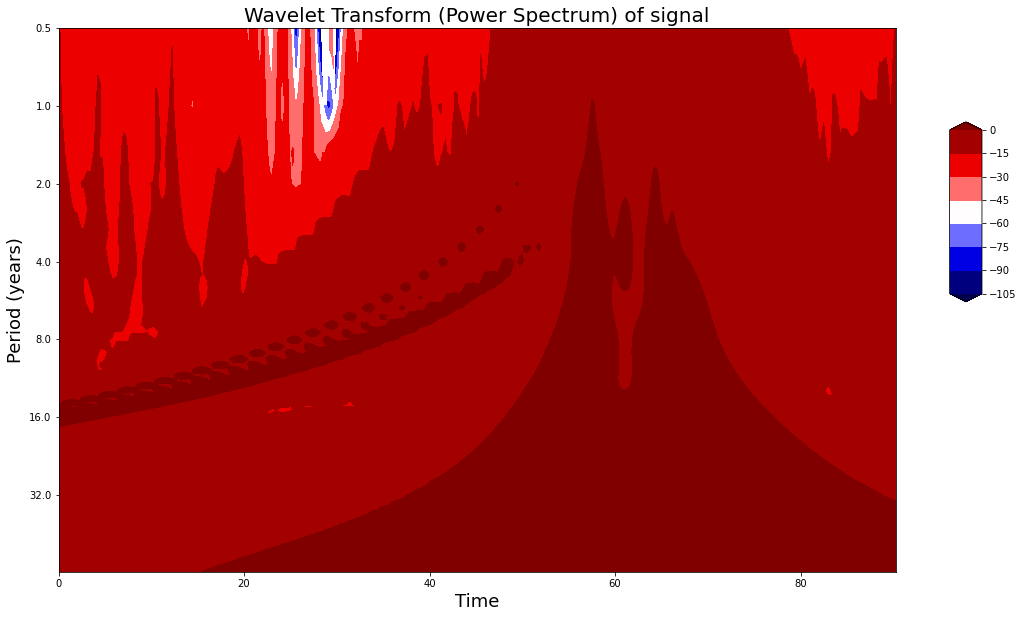

[[5.68351699e-05 3.73395067e-06 4.01843365e-08 ... 4.54020040e-06
  4.45565512e-06 8.82712906e-06]
 [1.16391536e-04 3.85057109e-05 4.59112998e-06 ... 8.10143079e-06
  2.04389488e-05 5.66799868e-05]
 [1.81623064e-04 9.30040302e-05 2.93479661e-05 ... 3.18333606e-05
  6.95631855e-05 1.02472773e-04]
 ...
 [1.41359035e-02 1.49099902e-02 1.50281129e-02 ... 5.33254535e+00
  5.18147318e+00 5.08777733e+00]
 [1.42217223e-02 1.51703082e-02 1.51752563e-02 ... 5.31567846e+00
  5.18841485e+00 5.05456927e+00]
 [1.45399183e-02 1.55140591e-02 1.55559803e-02 ... 5.48086670e+00
  5.28964201e+00 5.22466994e+00]] power


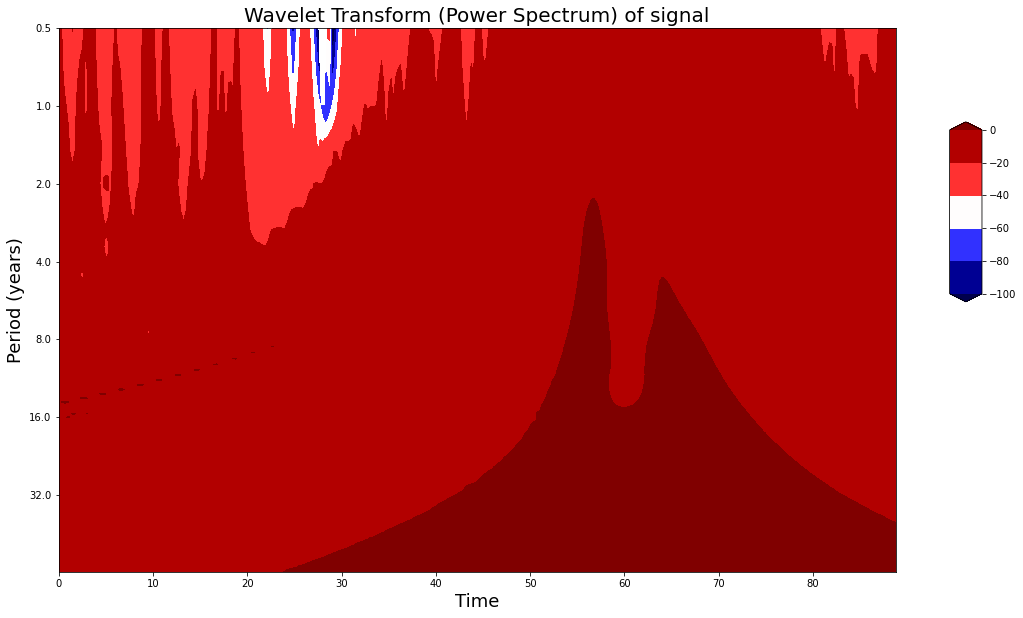

[[1.21707724e-05 5.27748816e-07 6.06840076e-08 ... 9.53479130e-07
  9.15810786e-07 2.18097944e-06]
 [2.29135552e-05 7.48373489e-06 1.04539088e-06 ... 1.34709692e-06
  4.25908154e-06 1.35746292e-05]
 [3.32211990e-05 1.75357670e-05 5.09041901e-06 ... 5.64320432e-06
  1.44126248e-05 2.27798497e-05]
 ...
 [3.04644101e-03 3.29680050e-03 3.33417865e-03 ... 1.29422983e+00
  1.24339607e+00 1.22312185e+00]
 [3.09683235e-03 3.32288085e-03 3.33635884e-03 ... 1.27320359e+00
  1.24609589e+00 1.21447430e+00]
 [3.20235314e-03 3.44915293e-03 3.47037100e-03 ... 1.30577788e+00
  1.26190836e+00 1.24821672e+00]] power


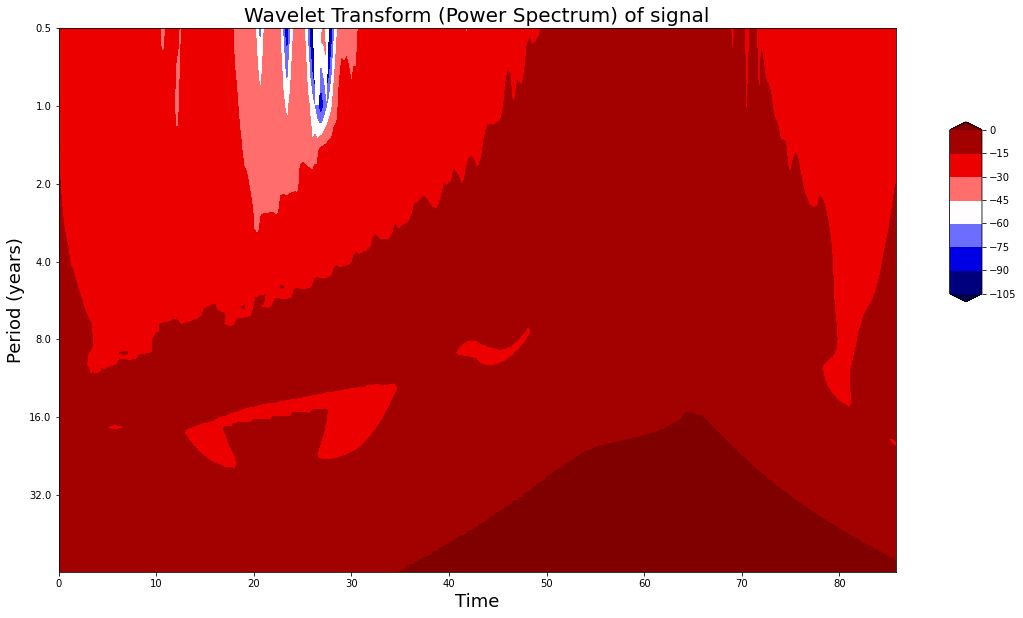

In [22]:
 for k in [3,6,12]:
    Data = Moving_average(k)
    Data = Data.T
    Data = Data.drop([i for i in np.arange(k-2)],axis = 0)
    for i in range(Data.shape[1]):
        df_nino = Data.iloc[:,4]
        N = df_nino.shape[0]
        t0=0
        dt=0.25
        time = np.arange(0, N) * dt + t0
        signal = df_nino.values.squeeze()
        scales = np.arange(1, 128)
        pow_,per_ = plot_wavelet(time, signal, scales)
        break
#         pd.DataFrame(pow_).to_csv(f"Transforms/{k}_dayMA/{i}_power.csv")
#         pd.DataFrame(pow_).to_csv(f"Transforms/{k}_dayMA/{i}_period.csv")

In [23]:
Data.shape

(362, 1008)

In [14]:
Data

,11,12,14,18,25,27,28,30,32,34,...,3849,3850,3851,3854,3855,3857,3858,3865,3867,3868
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001066,0.145688,0.012591,0.084618,0.055246,0.001244,0.001244,0.003796,0.071961,0.002030,...,0.428624,0.125544,0.418690,0.574591,0.574591,0.498179,0.119989,0.136734,0.265997,0.904943
2,0.004263,0.150770,0.012654,0.084237,0.055957,0.001286,0.001286,0.003819,0.071686,0.002042,...,0.424763,0.118092,0.464175,0.507117,0.507117,0.446310,0.114463,0.139119,0.263674,0.848677
3,0.007461,0.151617,0.014715,0.085761,0.072477,0.001352,0.001352,0.003841,0.076373,0.002074,...,0.413178,0.112932,0.431519,0.465923,0.465923,0.405298,0.110911,0.131964,0.260770,0.764278
4,0.008527,0.158394,0.015001,0.087667,0.071767,0.001388,0.001388,0.003796,0.086574,0.002042,...,0.405455,0.108346,0.386035,0.433962,0.433962,0.337748,0.107753,0.125604,0.256124,0.708013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0.001066,0.174487,0.010751,0.093575,0.054180,0.001226,0.001226,0.003071,0.062174,0.001607,...,0.358345,0.106053,0.075108,0.381403,0.381403,0.369111,0.329970,0.220205,0.476821,0.576725
359,0.001066,0.178722,0.010529,0.093194,0.052048,0.001220,0.001220,0.003107,0.060933,0.001595,...,0.341355,0.095734,0.070559,0.334527,0.334527,0.330511,0.286158,0.203511,0.439651,0.520460
360,0.010658,0.182110,0.010434,0.093003,0.051871,0.001424,0.001424,0.003066,0.060244,0.001601,...,0.324364,0.087136,0.070559,0.288361,0.288361,0.306386,0.253003,0.193176,0.407127,0.473571
361,0.056489,0.229544,0.010561,0.092432,0.051516,0.001562,0.001562,0.003053,0.062036,0.001607,...,0.321661,0.078537,0.083038,0.272025,0.272025,0.335336,0.230505,0.252798,0.380992,0.467945


In [59]:
data = data.fillna(method = 'ffill')

In [57]:
[i for i in np.arange(5-2)]

[0, 1, 2]

In [1]:
import pandas as pd

In [6]:
data2 = pd.read_csv('Transforms/12_dayMA/0_period.csv')
data2.shape

(127, 345)

In [3]:
data = pd.read_csv('Transforms/12_dayMA/0_power.csv')
data.shape

(127, 345)

In [4]:
from matplotlib import pyplot as plt

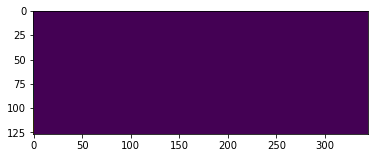

In [7]:
plt.imshow(data2)